# Corrplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
import matplotlib.patches as patches
from datetime import datetime
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400


warnings.filterwarnings('ignore')

In [ ]:
newest_file = "csv_combined_result_2023-12-22_163126"

big_table = pd.read_csv(f"../experiments/combined_base/{newest_file}.csv", index_col=0)
big_table

In [ ]:
original_order = big_table.measures.unique()
original_order

In [6]:
temp = big_table\
            .set_index(["dataset","measures","reranking"])\
            .unstack(2)\
            .reindex(original_order, level=1)

In [7]:
temp.columns = temp.columns.to_flat_index()

In [8]:
temp.columns = [f"{model}-{rerank}" if rerank != "-" else model for (model, rerank) in temp.columns]

## Full corr

In [ ]:
def clean_name(col):
    col = col.str.strip("@10")
    col = col\
            .str.replace("_our","")\
            .str.replace("_ori","")\
            .str.replace("_div","$_{\div}$", regex=False)\
            .str.replace("_mul","$_{\\times}$", regex=False)\
            .str.replace("_true","")
    
    return col

In [ ]:
list_dataset = big_table.dataset.unique()
fig, ax = plt.subplots(nrows=len(list_dataset),
                       figsize=(8,14)
                       )

pattern = "Gini|IAA|II|AI|IFD|MME|IWO|HD"

### Grid layout 2x2

Lastfm
Amazon-lb
QK-video
ML-10M


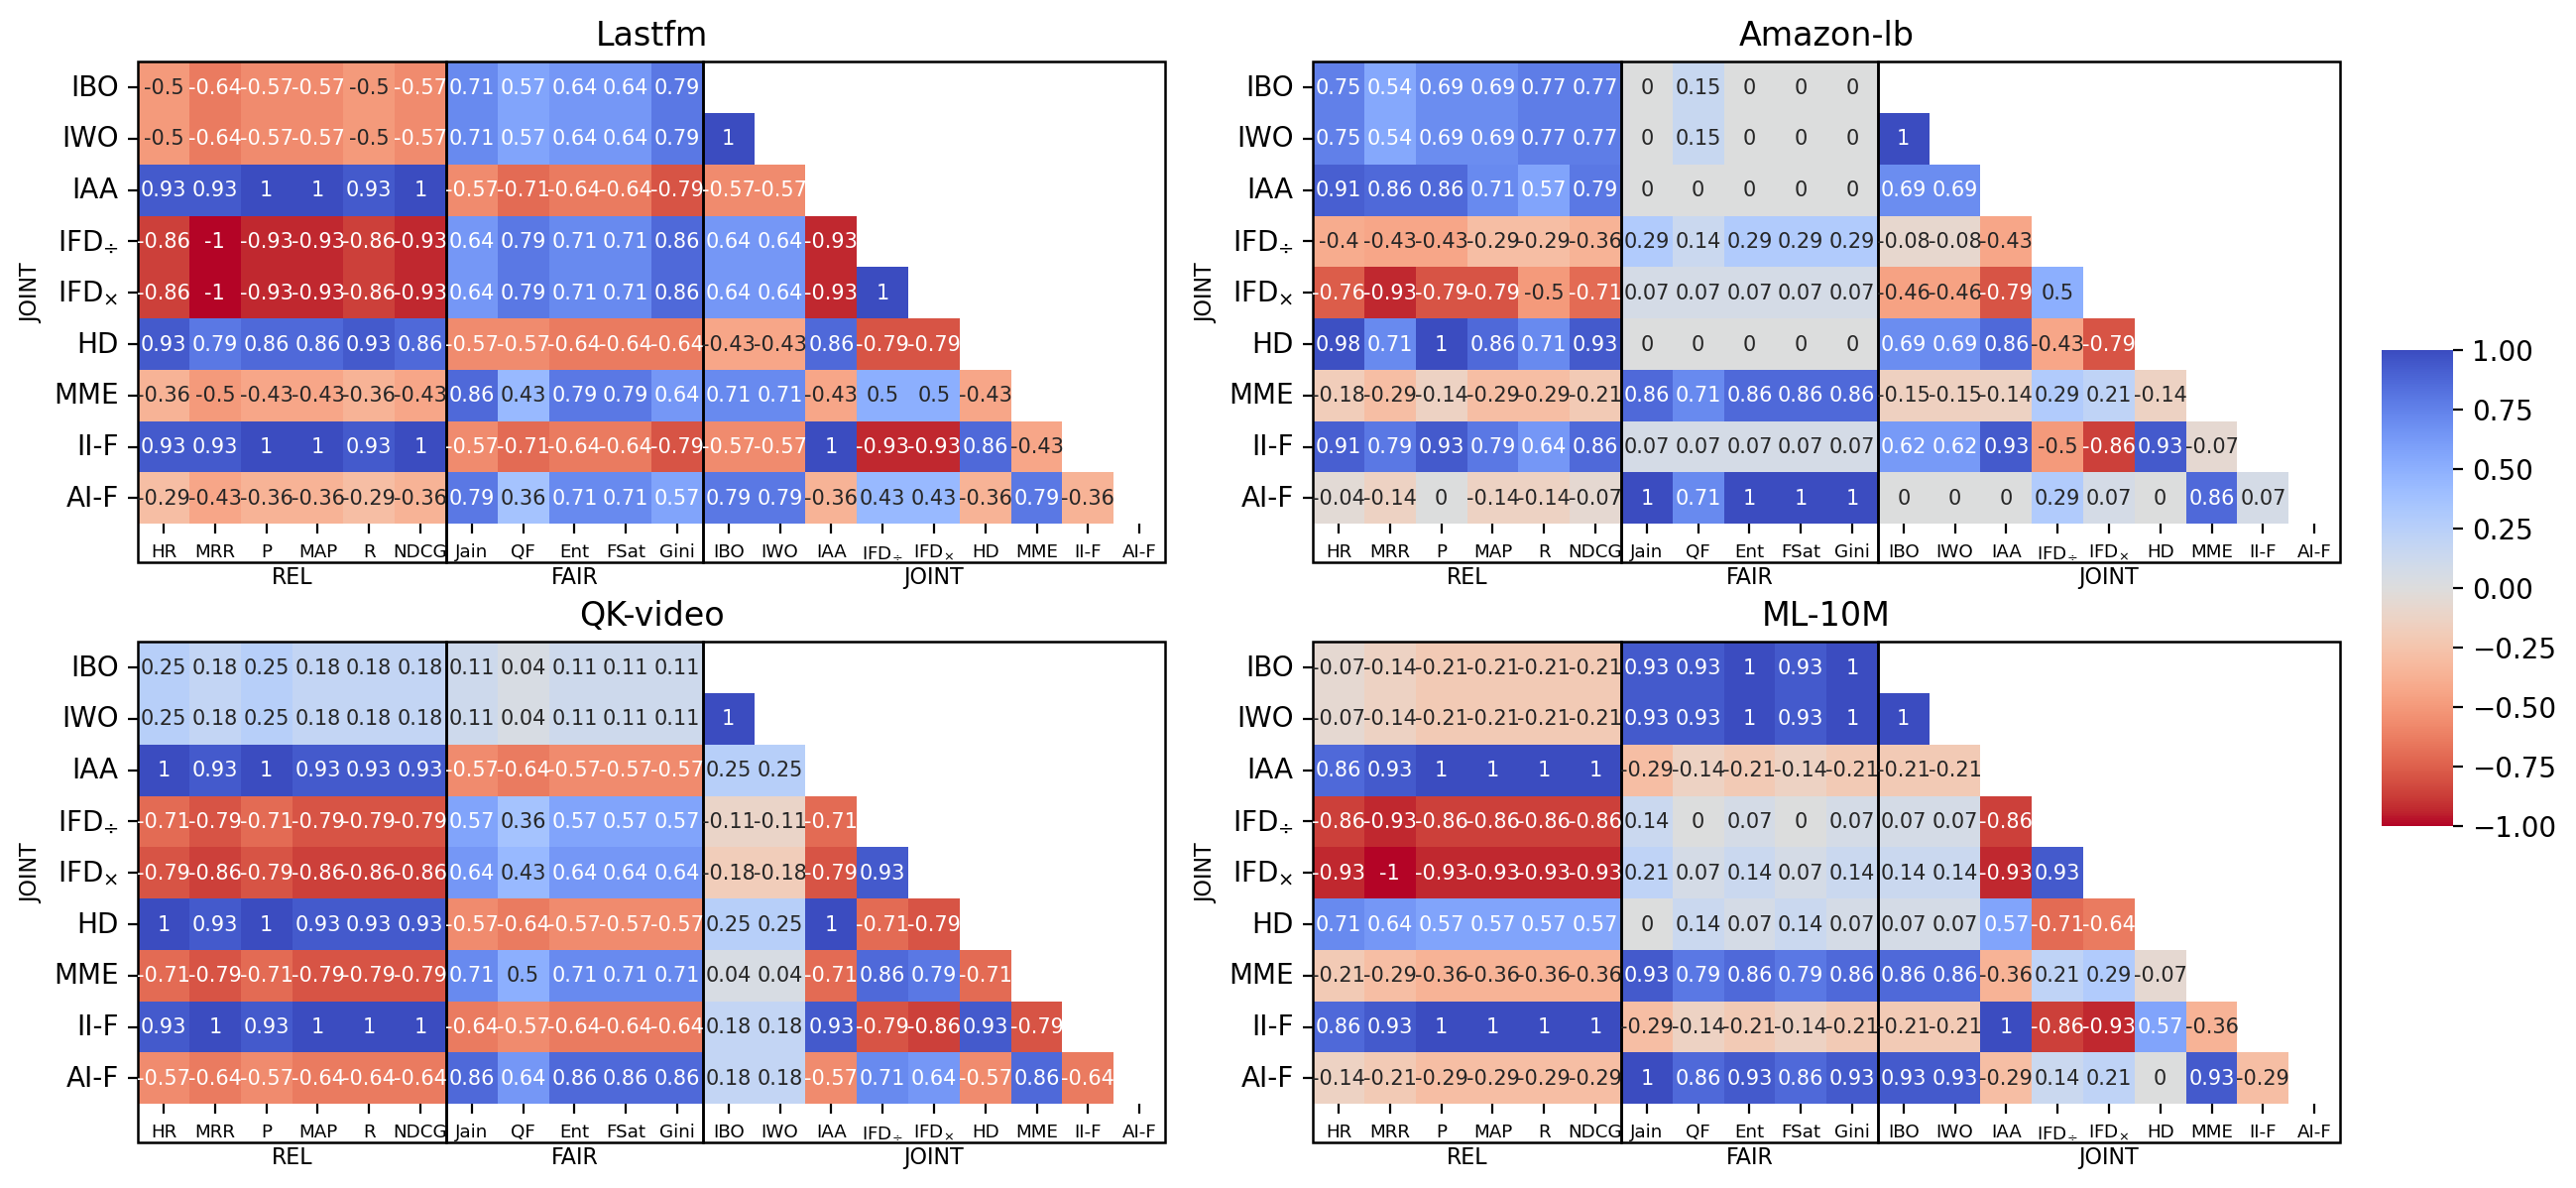

In [120]:
list_dataset = big_table.dataset.unique()
fig, ax = plt.subplots(nrows=2,ncols=2,
                       figsize=(12,6)
                       )
cbar_ax = fig.add_axes([1.005, .3, .03, .4])
for i, ax_id, data in zip(range(len(list_dataset)),ax.flatten(), list_dataset):

    forcorr = temp.loc[data].dropna().T
    forcorr.columns = clean_name(forcorr.columns)

    forcorr.loc[:,forcorr.columns.str.contains(pattern,regex=True)] = forcorr.loc[:,forcorr.columns.str.contains(pattern,regex=True)].apply(lambda x: -x)

    corr_tab = forcorr.corr("kendall").round(2)

    corr_tab = corr_tab.loc["IBO":"AI-F","HR":"AI-F"]
    unjoint_mask = np.zeros_like(corr_tab.loc[:,"HR":"Gini"], dtype=np.bool)
    joint_mask = np.triu(np.ones_like(corr_tab.loc[:,"IBO":], dtype=np.bool))
    mask = np.concatenate((unjoint_mask,joint_mask), axis=1)

    sns.heatmap(corr_tab, annot=True, square=True, vmin=-1, vmax=1, cmap="coolwarm_r", annot_kws={"size": 7.5}, ax=ax_id, mask=mask, cbar=i == 0,
                cbar_ax=None if i else cbar_ax)

    print(data)
    ax_id.set_yticklabels(ax_id.get_yticklabels(), rotation=0)

    ax_id.set_title(f"{data}")
    


    args = {"clip_on":False,"size":8}

    far_left = 0
    far_down = 9.75 #+ 1

    text_down = far_down + 0.5

    #REL-JOINT
    x = [far_left,6,6,far_left]
    y = [0,0,far_down,far_down]

    dict_args = dict(fill=False, linewidth=0.9, clip_on=False)

    ax_id.add_patch(patches.Polygon(xy=list(zip(x,y)),**dict_args))

    x = [6,11,11,6]
    ax_id.add_patch(patches.Polygon(xy=list(zip(x,y)),**dict_args))
    
    x = [11,20,20,11]
    ax_id.add_patch(patches.Polygon(xy=list(zip(x,y)),**dict_args))


    ax_id.text(0.5*(far_left+6), text_down, 'REL',
        horizontalalignment='center',
        verticalalignment='bottom',
        **args)
    
    ax_id.text(0.5*(6+11), text_down, 'FAIR',
        horizontalalignment='center',
        verticalalignment='bottom',
        **args)
    
    ax_id.text(0.5*(11+20), text_down, 'JOINT',
        horizontalalignment='center',
        verticalalignment='bottom',
        **args)
    

    ax_id.set_xticklabels(ax_id.get_xticklabels(), rotation=0, fontsize=6.6)
    ax_id.set_xlabel(None)
    ax_id.set_ylabel("JOINT", fontsize=8)

plt.tight_layout()
now = datetime.now()
time = str(now.strftime("%Y-%m-%d_%H%M%S"))
plt.savefig(f'corr/temp/temp_{time}_selected_rectangular_corr_plot_grid.pdf', bbox_inches='tight')

plt.show()